In [1]:
import matplotlib.pyplot as plt
from scipy import stats
from datetime import datetime
import seaborn as sns  # a visualization library based on matplotlib
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
sns.set(style="darkgrid")
%matplotlib inline
import pandas as pd
import numpy as np
from os.path import join
from pprint import pprint


d_file = "loan.csv"

df = pd.read_csv(join(d_file))



In this project we are going to try to predict credit subgrades of people according to their financial feautures.For that we are going to use "Lender's Club" credit data which is a real life data that includes real people's financial information.
First for getting to know the dataset we need to see head of the dataset.

In [2]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=145)

In [4]:
df.iloc[20]

id                                                                NaN
member_id                                                         NaN
loan_amnt                                                       10000
funded_amnt                                                     10000
funded_amnt_inv                                                 10000
term                                                        36 months
int_rate                                                        13.56
installment                                                    339.65
grade                                                               C
sub_grade                                                          C1
emp_title                                                         NaN
emp_length                                                   < 1 year
home_ownership                                               MORTGAGE
annual_inc                                                      65000
verification_status 

As you can see there are lots of nan values and features in this data we don't need the nan values and some of the features can be unnecessary so first we need to see the number of nan values and get rid of them.

In [5]:
df.isnull().sum()

id                                            2260668
member_id                                     2260668
loan_amnt                                           0
funded_amnt                                         0
funded_amnt_inv                                     0
term                                                0
int_rate                                            0
installment                                         0
grade                                               0
sub_grade                                           0
emp_title                                      166969
emp_length                                     146907
home_ownership                                      0
annual_inc                                          4
verification_status                                 0
issue_d                                             0
loan_status                                         0
pymnt_plan                                          0
url                         

In [6]:
df.shape

(2260668, 145)

As you can see in the above there are millions of nan values in the data so we are going to delete columns that has nan values more than "668".

In [7]:
df=df.dropna(axis=1, thresh=2260000)

In [8]:
df.shape

(2260668, 46)

In [9]:
df.isnull().sum()

loan_amnt                       0
funded_amnt                     0
funded_amnt_inv                 0
term                            0
int_rate                        0
installment                     0
grade                           0
sub_grade                       0
home_ownership                  0
annual_inc                      4
verification_status             0
issue_d                         0
loan_status                     0
pymnt_plan                      0
purpose                         0
zip_code                        1
addr_state                      0
delinq_2yrs                    29
earliest_cr_line               29
inq_last_6mths                 30
open_acc                       29
pub_rec                        29
revol_bal                       0
total_acc                      29
initial_list_status             0
out_prncp                       0
out_prncp_inv                   0
total_pymnt                     0
total_pymnt_inv                 0
total_rec_prnc

As we drop the columns that have too much nan values we still have some nan values but this time we are not going to drop columns because it can harm our features and predictions instead we are just going to drop rows that has nan values.

In [10]:
df=df.dropna(axis=0, how="any")

In [11]:
df.isnull().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
purpose                       0
zip_code                      0
addr_state                    0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_re

In [12]:
df.shape

(2260450, 46)

As you can see now our data is clean and smaller in size now we will examine the dataset again.

In [13]:
df.iloc[20]

loan_amnt                            10000
funded_amnt                          10000
funded_amnt_inv                      10000
term                             36 months
int_rate                             13.56
installment                         339.65
grade                                    C
sub_grade                               C1
home_ownership                    MORTGAGE
annual_inc                           65000
verification_status           Not Verified
issue_d                           Dec-2018
loan_status                        Current
pymnt_plan                               n
purpose                        credit_card
zip_code                             937xx
addr_state                              CA
delinq_2yrs                              0
earliest_cr_line                  Dec-2004
inq_last_6mths                           1
open_acc                                14
pub_rec                                  1
revol_bal                             9765
total_acc  

In [14]:
df.iloc[22]

loan_amnt                             9600
funded_amnt                           9600
funded_amnt_inv                       9600
term                             36 months
int_rate                              23.4
installment                         373.62
grade                                    E
sub_grade                               E1
home_ownership                        RENT
annual_inc                           65000
verification_status           Not Verified
issue_d                           Dec-2018
loan_status                        Current
pymnt_plan                               n
purpose                        credit_card
zip_code                             265xx
addr_state                              WV
delinq_2yrs                              1
earliest_cr_line                  Sep-2003
inq_last_6mths                           0
open_acc                                12
pub_rec                                  0
revol_bal                            10678
total_acc  

When we examine the data we see that there are lots of features which recorded as strings but because we are going to use machine techniques we need to transform them into numerical values(for algorithms to run more efficiently).Also we are going to change date values which are strings to datetime because it make it easier to use dates.

In [15]:
df["last_credit_pull_d"].unique()

array(['Feb-2019', 'Jan-2019', 'Dec-2018', 'Nov-2018', 'Oct-2018',
       'Sep-2018', 'Aug-2018', 'Jul-2018', 'Jun-2018', 'May-2018',
       'Apr-2018', 'Mar-2018', 'Feb-2018', 'Jan-2018', 'Dec-2017',
       'Nov-2017', 'Aug-2017', 'Jul-2017', 'Jun-2017', 'Mar-2017',
       'Sep-2016', 'May-2017', 'Sep-2017', 'Jan-2017', 'Oct-2017',
       'Feb-2017', 'Oct-2016', 'Apr-2017', 'Dec-2016', 'Nov-2016',
       'Aug-2016', 'Jul-2016', 'Jun-2016', 'May-2016', 'Apr-2016',
       'Mar-2016', 'Mar-2019', 'Feb-2016', 'Jan-2016', 'Dec-2015',
       'Nov-2015', 'Oct-2015', 'Sep-2015', 'Aug-2015', 'Jul-2015',
       'Jun-2015', 'May-2015', 'Apr-2015', 'Mar-2015', 'Feb-2015',
       'Jan-2015', 'Dec-2014', 'Aug-2014', 'Mar-2014', 'Sep-2014',
       'May-2014', 'Jan-2014', 'Jul-2014', 'Feb-2014', 'Nov-2014',
       'Jun-2014', 'Oct-2014', 'Apr-2014', 'Nov-2013', 'Dec-2013',
       'Oct-2013', 'Sep-2013', 'Aug-2013', 'Jun-2013', 'Jul-2013',
       'May-2013', 'Apr-2013', 'Mar-2013', 'Jan-2013', 'Dec-20

In [16]:
def to_date(sacma):
        k=sacma.replace('-', '.')
        k=k.replace('Jan', '01') 
        k=k.replace('Feb', '02')
        k=k.replace('Mar', '03')
        k=k.replace('Apr', '04')
        k=k.replace('May', '05')
        k=k.replace('Jun', '06')
        k=k.replace('Jul', '07')
        k=k.replace('Aug', '08')
        k=k.replace('Sep', '09')
        k=k.replace('Oct', '10')
        k=k.replace('Nov', '11')
        k=k.replace('Dec', '12')
        obj = datetime.strptime(k, '%m.%Y')
    
        return obj

df["last_credit_pull_d"] = df["last_credit_pull_d"].apply(to_date)
     

In [17]:
df["last_credit_pull_d"].unique()

array(['2019-02-01T00:00:00.000000000', '2019-01-01T00:00:00.000000000',
       '2018-12-01T00:00:00.000000000', '2018-11-01T00:00:00.000000000',
       '2018-10-01T00:00:00.000000000', '2018-09-01T00:00:00.000000000',
       '2018-08-01T00:00:00.000000000', '2018-07-01T00:00:00.000000000',
       '2018-06-01T00:00:00.000000000', '2018-05-01T00:00:00.000000000',
       '2018-04-01T00:00:00.000000000', '2018-03-01T00:00:00.000000000',
       '2018-02-01T00:00:00.000000000', '2018-01-01T00:00:00.000000000',
       '2017-12-01T00:00:00.000000000', '2017-11-01T00:00:00.000000000',
       '2017-08-01T00:00:00.000000000', '2017-07-01T00:00:00.000000000',
       '2017-06-01T00:00:00.000000000', '2017-03-01T00:00:00.000000000',
       '2016-09-01T00:00:00.000000000', '2017-05-01T00:00:00.000000000',
       '2017-09-01T00:00:00.000000000', '2017-01-01T00:00:00.000000000',
       '2017-10-01T00:00:00.000000000', '2017-02-01T00:00:00.000000000',
       '2016-10-01T00:00:00.000000000', '2017-04-01

In the above cells we transform string dates to datetime dates by converting string to datetime.

In [18]:
def to_months(term):
    term=int(term[:3])
    return term
df["term"]=df["term"].apply(to_months)

In [19]:
df["term"]

0          36
1          60
2          36
3          36
4          60
5          36
6          36
7          36
8          36
9          36
10         36
11         60
12         36
13         36
14         60
15         36
16         36
17         60
18         60
19         60
20         36
21         36
22         36
23         36
24         60
25         60
26         36
27         60
28         36
29         60
           ..
2260638    36
2260639    36
2260640    60
2260641    60
2260642    36
2260643    36
2260644    60
2260645    36
2260646    60
2260647    36
2260648    60
2260649    36
2260650    60
2260651    60
2260652    60
2260653    36
2260654    60
2260655    60
2260656    60
2260657    60
2260658    60
2260659    36
2260660    36
2260661    60
2260662    60
2260663    60
2260664    60
2260665    36
2260666    60
2260667    60
Name: term, Length: 2260450, dtype: int64

In the cells above we change the "term" value which is in string type to integer type by manipulating it via our function.

In [20]:
df.iloc[22]

loan_amnt                                    9600
funded_amnt                                  9600
funded_amnt_inv                              9600
term                                           36
int_rate                                     23.4
installment                                373.62
grade                                           E
sub_grade                                      E1
home_ownership                               RENT
annual_inc                                  65000
verification_status                  Not Verified
issue_d                                  Dec-2018
loan_status                               Current
pymnt_plan                                      n
purpose                               credit_card
zip_code                                    265xx
addr_state                                     WV
delinq_2yrs                                     1
earliest_cr_line                         Sep-2003
inq_last_6mths                                  0


In the below cells we are numerating the string values to use machine learning better and we did it by mapping strategy.This means that we give each unique string of every column a numerical value(ex:1,2,...)

In [21]:
df["home_ownership"].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'ANY', 'NONE', 'OTHER'], dtype=object)

In [22]:
df['home_ownership'] = df['home_ownership'].map({'RENT':1, 'MORTGAGE':0, "OWN":2, "ANY":3, "NONE":4, "OTHER":5})

In [23]:
df["verification_status"].unique()

array(['Not Verified', 'Source Verified', 'Verified'], dtype=object)

In [24]:
df["verification_status"] = df["verification_status"].map({'Not Verified':1, 'Source Verified':0, "Verified":2})

In [25]:
df["loan_status"].unique()

array(['Current', 'Fully Paid', 'Late (31-120 days)', 'In Grace Period',
       'Charged Off', 'Late (16-30 days)', 'Default',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [26]:
df['loan_status'] = df['loan_status'].map({'Current':1, 'Fully Paid':0, "Late (31-120 days)":2, "In Grace Period":3, "Charged Off":4, "Late (16-30 days)":5,"Default":6,'Does not meet the credit policy. Status:Fully Paid':7,'Does not meet the credit policy. Status:Charged Off':8 })

In [27]:
df["pymnt_plan"].unique()

array(['n', 'y'], dtype=object)

In [28]:
df["pymnt_plan"]=df["pymnt_plan"].map({"n":0 , "y":1})

In [29]:
df["purpose"].unique()


array(['debt_consolidation', 'credit_card', 'house', 'car', 'other',
       'vacation', 'home_improvement', 'small_business', 'major_purchase',
       'medical', 'renewable_energy', 'moving', 'wedding', 'educational'],
      dtype=object)

In [30]:
df["purpose"] = df["purpose"].map({'debt_consolidation':1, 'credit_card':0, "house":2, "car":3, "other":4, "vacation":5,"home_improvement":6,'small_business':7,'major_purchase':8,"medical":9, "renewable_energy":10,"moving":11,"wedding":12,"educational":13 })

In [31]:
holy=df["zip_code"][0]
type(holy)
holy[:3]

'109'

In [32]:
def give_zip(zipp):
    zipp=int(zipp[:3])
    
    return zipp

df["zip_code"]=df["zip_code"].apply(give_zip)

In [33]:
del df['addr_state']

In [34]:
df.iloc[22]

loan_amnt                                    9600
funded_amnt                                  9600
funded_amnt_inv                              9600
term                                           36
int_rate                                     23.4
installment                                373.62
grade                                           E
sub_grade                                      E1
home_ownership                                  1
annual_inc                                  65000
verification_status                             1
issue_d                                  Dec-2018
loan_status                                     1
pymnt_plan                                      0
purpose                                         0
zip_code                                      265
delinq_2yrs                                     1
earliest_cr_line                         Sep-2003
inq_last_6mths                                  0
open_acc                                       12


In [35]:
df["issue_d"] = df["issue_d"].apply(to_date)
df["earliest_cr_line"] = df["earliest_cr_line"].apply(to_date)

In [36]:
df["initial_list_status"].unique()

array(['w', 'f'], dtype=object)

In [37]:
df["initial_list_status"]=df["initial_list_status"].map({"w":0 , "f":1})

In [38]:
df["application_type"].unique()

array(['Individual', 'Joint App'], dtype=object)

In [39]:
df["application_type"]=df["application_type"].map({"Individual":0 , "Joint App":1})

In [40]:
df["debt_settlement_flag"].unique()

array(['N', 'Y'], dtype=object)

In [41]:
df["hardship_flag"]=df["hardship_flag"].map({"N":0 , "Y":1})

In [42]:
df["debt_settlement_flag"]=df["debt_settlement_flag"].map({"N":0 , "Y":1})

In [43]:
df["disbursement_method"].unique()

array(['Cash', 'DirectPay'], dtype=object)

In [44]:
df["disbursement_method"]=df["disbursement_method"].map({'Cash':0 , 'DirectPay':1})

In [45]:
def gradetonum(subg):
    if subg=="A1":
        return 30
    elif subg=="A2":
        return 29
    elif subg=="A3":
        return 28
    elif subg=="A4":
        return 27
    elif subg=="A5":
        return 26
    elif subg=="B1":
        return 25
    elif subg=="B2":
        return 24
    elif subg=="B3":
        return 23
    elif subg=="B4":
        return 22
    elif subg=="B5":
        return 21
    elif subg=="C1":
        return 20
    elif subg=="C2":
        return 19
    elif subg=="C3":
        return 18
    elif subg=="C4":
        return 17
    elif subg=="C5":
        return 16
    elif subg=="D1":
        return 15
    elif subg=="D2":
        return 14
    elif subg=="D3":
        return 13
    elif subg=="D4":
        return 12
    elif subg=="D5":
        return 11
    elif subg=="E1":
        return 10
    elif subg=="E2":
        return 9
    elif subg=="E3":
        return 8
    elif subg=="E4":
        return 7
    elif subg=="E5":
        return 6
    elif subg=="F1":
        return 5
    elif subg=="F2":
        return 4
    elif subg=="F3":
        return 3
    elif subg=="F4":
        return 2
    elif subg=="F5":
        return 1
   

df["sub_grade"] = df["sub_grade"].apply(gradetonum)

In [46]:
del df['grade']

In [47]:
df.iloc[22]

loan_amnt                                    9600
funded_amnt                                  9600
funded_amnt_inv                              9600
term                                           36
int_rate                                     23.4
installment                                373.62
sub_grade                                      10
home_ownership                                  1
annual_inc                                  65000
verification_status                             1
issue_d                       2018-12-01 00:00:00
loan_status                                     1
pymnt_plan                                      0
purpose                                         0
zip_code                                      265
delinq_2yrs                                     1
earliest_cr_line              2003-09-01 00:00:00
inq_last_6mths                                  0
open_acc                                       12
pub_rec                                         0


In [48]:
df.dtypes

loan_amnt                              int64
funded_amnt                            int64
funded_amnt_inv                      float64
term                                   int64
int_rate                             float64
installment                          float64
sub_grade                            float64
home_ownership                         int64
annual_inc                           float64
verification_status                    int64
issue_d                       datetime64[ns]
loan_status                            int64
pymnt_plan                             int64
purpose                                int64
zip_code                               int64
delinq_2yrs                          float64
earliest_cr_line              datetime64[ns]
inq_last_6mths                       float64
open_acc                             float64
pub_rec                              float64
revol_bal                              int64
total_acc                            float64
initial_li

In [49]:
df.isnull().sum()

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
sub_grade                     12161
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
purpose                           0
zip_code                          0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths                    0
open_acc                          0
pub_rec                           0
revol_bal                         0
total_acc                         0
initial_list_status               0
out_prncp                         0
out_prncp_inv                     0
total_pymnt                       0
total_pymnt_inv                   0
total_rec_prncp             

In [50]:
df.shape

(2260450, 44)

In [51]:
df=df.dropna(axis=0, how="any")

In [52]:
df.isnull().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
sub_grade                     0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
purpose                       0
zip_code                      0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collecti

In [53]:
df.shape

(2248289, 44)

# Machine Learning - Random Forest

In [54]:
from sklearn.model_selection import train_test_split

X=df.drop(['sub_grade',"last_credit_pull_d","earliest_cr_line","issue_d"], axis=1)

y = df.iloc[:, df.columns == 'sub_grade']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state = 42)

In [55]:
from sklearn.ensemble import RandomForestClassifier
rf  = RandomForestClassifier(random_state = 42)

In [56]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [57]:
pred_rf = rf.predict(X_test)

In [58]:
from sklearn import metrics

print("Accuracy of the random forest model: ",metrics.accuracy_score(y_test, pred_rf))

Accuracy of the random forest model:  0.7713001691951046


In [59]:
rf.feature_importances_

array([2.10911118e-02, 2.10826271e-02, 2.33018104e-02, 4.09813596e-03,
       3.98388285e-01, 7.52704406e-02, 8.45751633e-03, 2.76064071e-02,
       8.37068539e-03, 3.76964195e-03, 1.48582743e-05, 9.41182037e-03,
       2.81331424e-02, 6.38694967e-03, 8.93576919e-03, 2.24915521e-02,
       4.88550793e-03, 2.90298542e-02, 2.53581886e-02, 6.33627862e-03,
       1.53704042e-02, 1.49249259e-02, 3.80048676e-02, 3.68725148e-02,
       3.39675373e-02, 5.71015649e-02, 2.26683603e-03, 4.08631674e-03,
       3.89852656e-03, 5.43920335e-02, 8.57845157e-04, 0.00000000e+00,
       1.29083306e-03, 2.38707269e-04, 4.62125058e-04, 2.04805901e-04,
       1.36905449e-03, 1.81065837e-05, 1.70181994e-03, 5.50591938e-04])

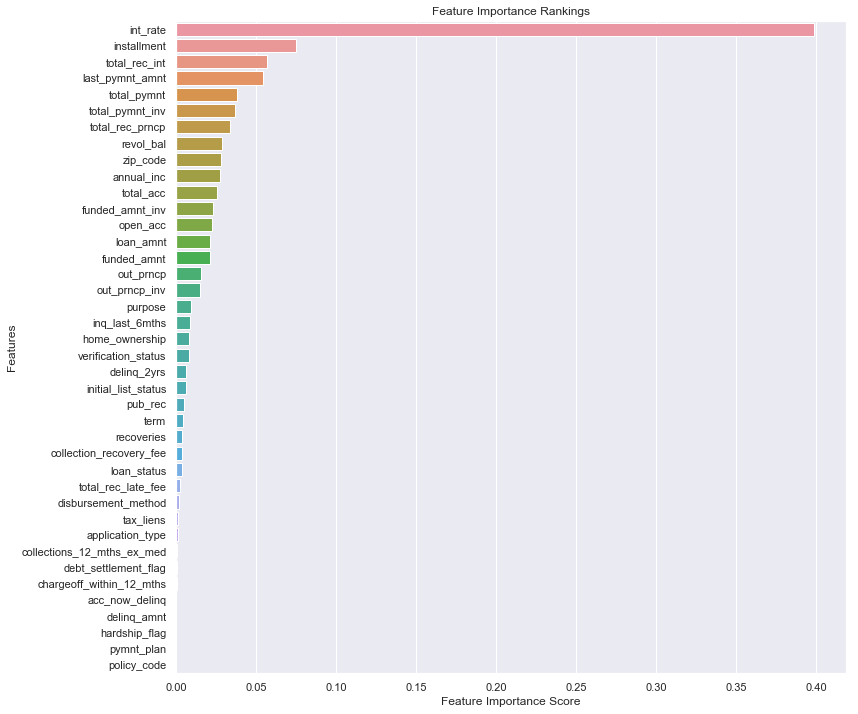

In [60]:
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(12, 12))
sns.barplot(x=feature_importances, y=feature_importances.index)

 
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Feature Importance Rankings")
plt.show()

# k-NN

In [1]:


X=df.drop(['sub_grade',"last_credit_pull_d","earliest_cr_line","issue_d"], axis=1)
y = df.iloc[:, df.columns == 'sub_grade']
X=X[::20]
y=y[::20]  #if we take all of the data, it takes so musch time to process




X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state = 42)

NameError: name 'df' is not defined

In [2]:
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [66]:
y_pred = knn.predict(X_test)

In [67]:
from sklearn import metrics

print("Accuracy of the model with k = 5 :",metrics.accuracy_score(y_test, y_pred))

Accuracy of the model with k = 5 : 0.05846142897808141


In [68]:
knn_7 = KNeighborsClassifier(n_neighbors=7)
knn_7.fit(X_train, y_train)

y_pred_7 = knn_7.predict(X_test)
print("Accuracy of the model with k = 7 :",metrics.accuracy_score(y_test, y_pred_7))

Accuracy of the model with k = 7 : 0.06397665812695702


In [69]:
accuracy_list = []
for k in range (1, 25):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_list.append(metrics.accuracy_score(y_test, y_pred))

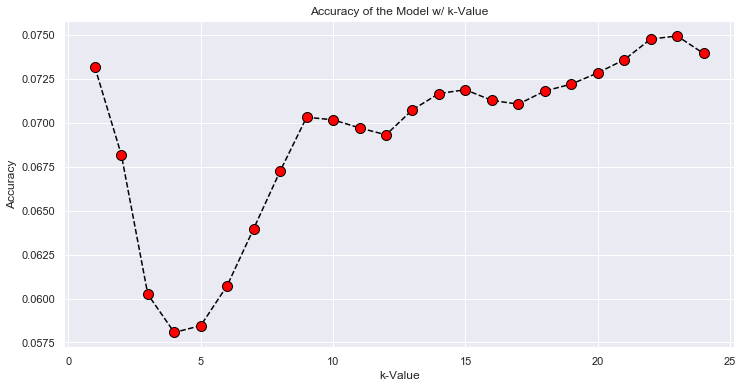

In [70]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 25), accuracy_list, color='black', linestyle='dashed', marker='o',  
         markerfacecolor='red', markersize=10)
plt.title('Accuracy of the Model w/ k-Value')  
plt.xlabel('k-Value')  
plt.ylabel('Accuracy') 
plt.show()